In [1]:
#Uncomment following lines if running in Google Colab 
! pip install -q 'gwosc==0.5.4'
! pip install -q 'gwpy==2.0.2'
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf -P data/
! pip install -q 'PyCBC==1.18.0' 'lalsuite==6.82'

Reason for being yanked: Metadata is broken
     |████████████████████████████████| 1.4 MB 4.5 MB/s 
     |████████████████████████████████| 51 kB 5.1 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 3.6 MB 36.9 MB/s 
--2022-02-15 01:01:06--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘data/challenge1.gwf’

challenge1.gwf      100%[===================>]   3.84M  1.67MB/s    in 2.3s    

2022-02-15 01:01:09 (1.67 MB/s) - ‘data/challenge1.gwf’ saved [4025674/4025674]

     |████████████████████████████████| 6.3 MB 3.7 MB/s 
     |████████████████████████████████| 27.3 MB 1.5 MB/s 
     |████████████████████████████████| 201 kB 52.9 MB/s 
     |███████████████████

In [2]:
#imports
import gwosc
import gwpy
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import data and check sample rate and duration
data = TimeSeries.read('data/challenge1.gwf',channel = 'H1:CHALLENGE1')
print("The data has the following properties,\n sample rate: {} \n duration: {}".format(data.sample_rate,data.duration))

The data has the following properties,
 sample rate: 4096.0 Hz 
 duration: 128.0 s


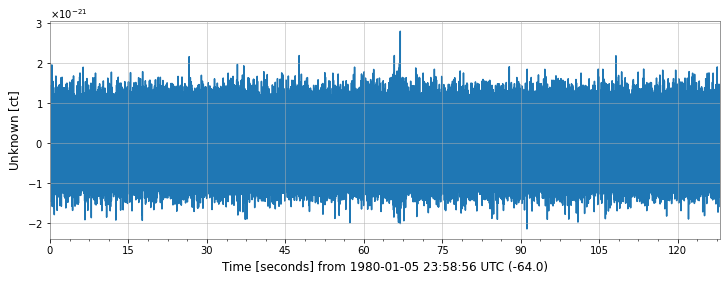

In [4]:
#make a time-domain plot
time_domain = data.plot()

7.523586098767819e-23 ct / Hz(1/2)  and min 1.6920495714466454e-29 ct / Hz(1/2)


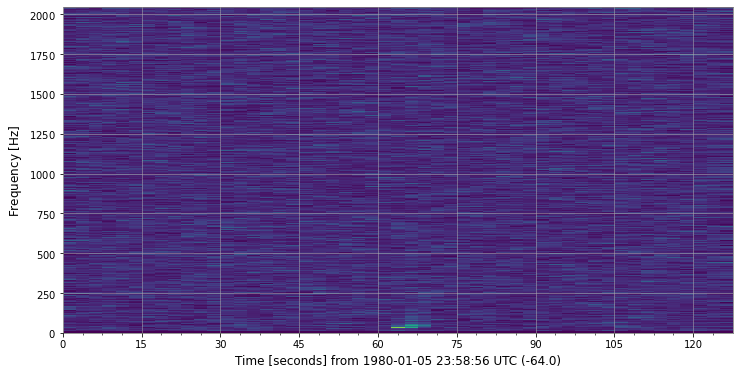

In [5]:
#it is imposible to identify anything in the time-domain plot, therefore a spectogram will be plotted.

spectro = data.spectrogram2(fftlength=5,overlap=2.5,window='hann') **(1/2)
plot = spectro.plot()
axis = plot.gca()
print(spectro.max()," and min",spectro.min())

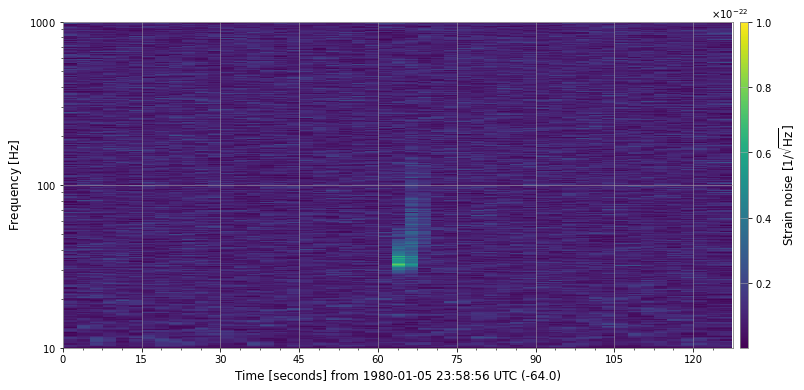

In [6]:
#change axis, zoom in and change colorbar
axis = plot.gca()
axis.set_yscale('log')
axis.set_ylim(10,1000)
axis.colorbar(clim=(1e-25, 1e-22),norm="",label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",)
plot

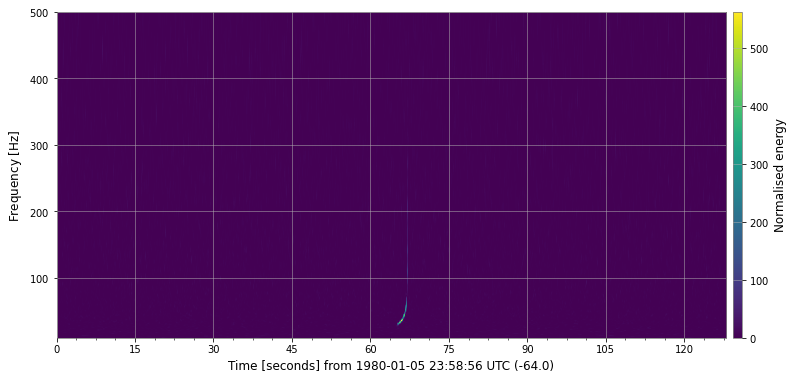

In [7]:
#it seems like the merger occurs between 62-70 sec as the power spectral density is highest there
#we can try to check this by performing a q-transform

q = data.q_transform(frange=(10, 500))
plotq = q.plot()
plotq.colorbar(label="Normalised energy")

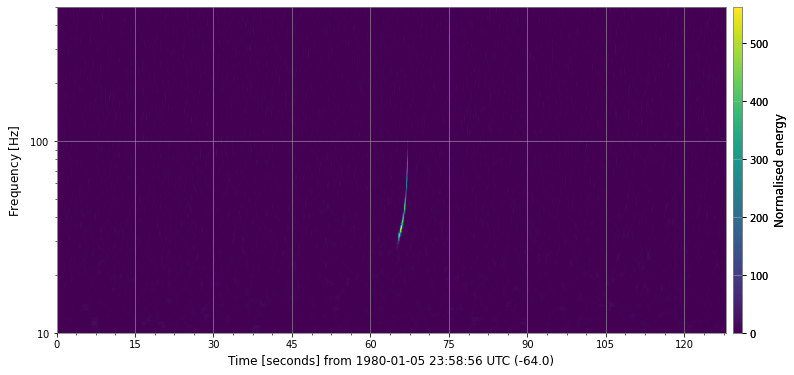

In [8]:
#changing axis
axisq = plotq.gca()
axisq.set_yscale('log')
axisq.colorbar(label="Normalised energy")
plotq

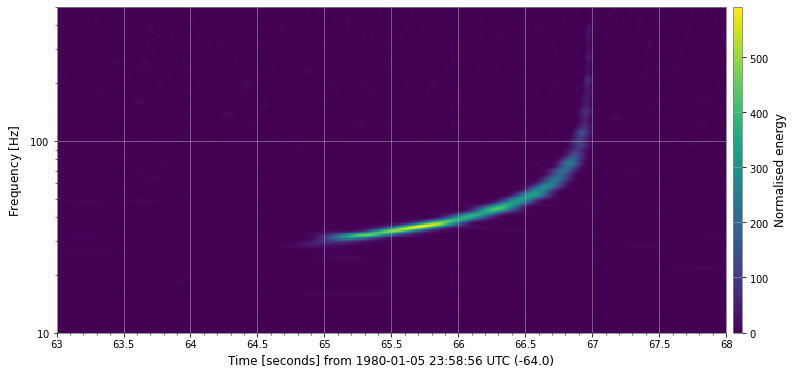

In [9]:
#take a smaller time-range
q2 = data.q_transform(frange=(10, 500), qrange=(10, 110), outseg=(-1,4)) 
plotq2 = q2.plot()
axisq2 = plotq2.gca()
axisq2.set_epoch(data.epoch)
axisq2.set_yscale('log')
axisq2.colorbar(label="Normalised energy")

In [10]:
#the q-transform show that the merger seems to occur at 65.75s as the normalised energy is highest at that time